In [1]:
import os
os.chdir("../")

In [157]:
import albumentations as A
import cv2
from pathlib import Path
from matplotlib import pyplot as plt
from src.utils.config import load_config
from src.data_operations import coco_labels_ops
import json
import numpy as np

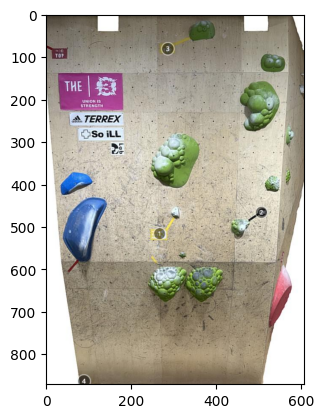

In [3]:
global_config, local_config = load_config()
image_id = 18
test_image_filename = str(image_id)+".jpg"
test_image = cv2.cvtColor(
    cv2.imread(
        local_config["PATH"]["coco_routes"]
        +test_image_filename
    ),
    cv2.COLOR_BGR2RGB,
)
plt.imshow(test_image)

##### PIXEL-LEVEL 
Experimenting on different transformations. Useful:
- Channel shuffle, hue variations (with hold-mask merging)
- Downscale, ImageCompression
- Blurr?
- Emboss
- PixelDistributedAdaptation, FancyPCA, FDA, limited RGBShift (for "ambient" matching)
- RingingOvershoot?

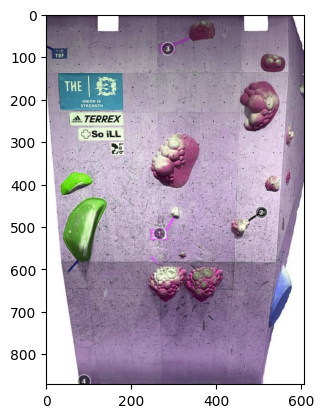

In [4]:
transform = A.Compose([
    A.ChannelShuffle(p=1),
])
transformed_image = transform(image=test_image)["image"]
plt.imshow(transformed_image)

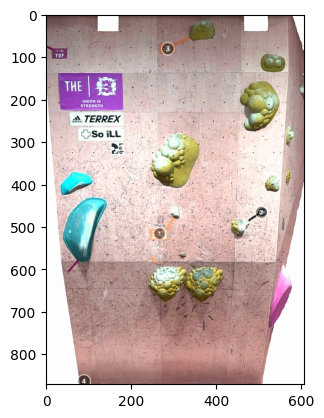

In [5]:
transform = A.Compose([
    A.ColorJitter(hue=1, p=1),
])
transformed_image = transform(image=test_image)["image"]
plt.imshow(transformed_image)

c:\Users\marce\miniconda3\envs\tfg\lib\site-packages\albumentations\augmentations\transforms.py:1554: UserWarning: Using default interpolation INTER_NEAREST, which is sub-optimal.Please specify interpolation mode for downscale and upscale explicitly.For additional information see this PR https://github.com/albumentations-team/albumentations/pull/584
  warnings.warn(


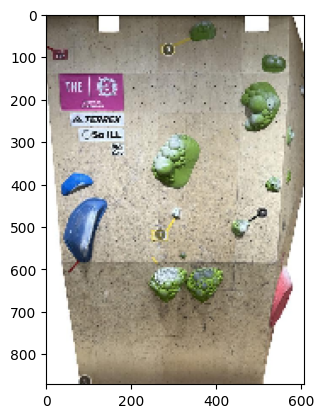

In [6]:
transform = A.Compose([
    A.Downscale(p=1),
])
transformed_image = transform(image=test_image)["image"]
plt.imshow(transformed_image)

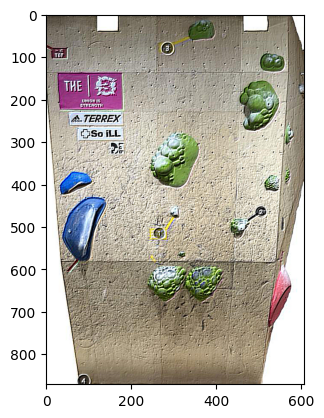

In [7]:
### Enhance image "relief"
transform = A.Compose([
    A.Emboss(alpha=1, strength=(0.9,1), p=1),
])
transformed_image = transform(image=test_image)["image"]
plt.imshow(transformed_image)

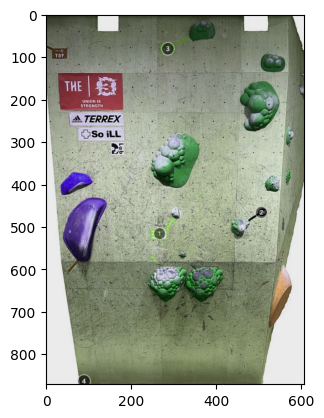

In [8]:
transform = A.Compose([
    A.HueSaturationValue(hue_shift_limit=50, sat_shift_limit=10, p=1),
])
transformed_image = transform(image=test_image)["image"]
plt.imshow(transformed_image)

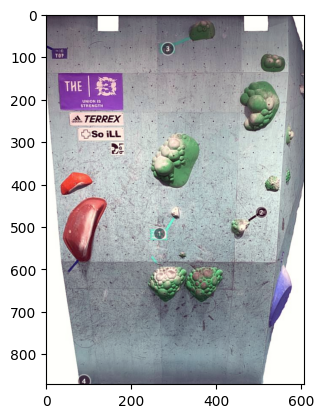

In [9]:
reference_image = local_config["PATH"]["coco_routes"]+"133.jpg"
transform = A.Compose([
    A.PixelDistributionAdaptation([reference_image], blend_ratio=(0.75,1), p=1),
])
transformed_image = transform(image=test_image)["image"]
plt.imshow(transformed_image)

##### SPATIAL-LEVEL 
Experimenting on different transformations. Useful:
- hsaj

In [10]:
labels_file = "coco_route_labels.json"
with open(
    Path(local_config["PATH"]["coco_labels"]).joinpath(labels_file)
) as file:
    coco_labels = json.load(file)
coco_labels.keys()

dict_keys(['info', 'images', 'annotations', 'categories'])

COCO POLYGON INTO BINARY NUMPY MASK

In [80]:
image_labels = [
    label["segmentation"]
    for label in coco_labels["annotations"]
    if label["image_id"]==image_id
]
filled_masks = coco_labels_ops.coco_polygons_to_numpy_masks(
    image_labels,
    test_image.shape[:2]
)

numpy.ndarray

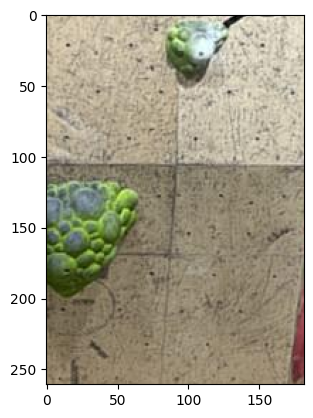

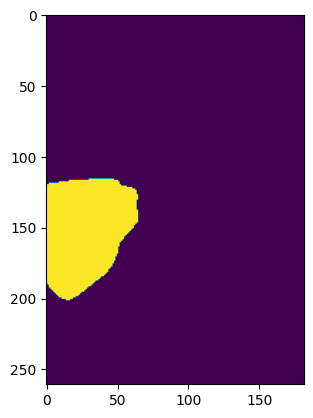

In [15]:
transform = A.Compose([
    A.RandomCrop(
        height=int(test_image.shape[0]*0.3),
        width=int(test_image.shape[1]*0.3)),
])
transformed_image = transform(image=test_image, masks=filled_masks)
plt.imshow(transformed_image["image"])
plt.show()
plt.imshow(transformed_image["masks"][0])

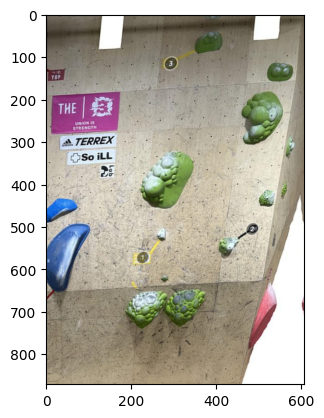

In [18]:
transform = A.Compose([
    A.ElasticTransform(p=1)
])
transformed_image = transform(image=test_image, masks=filled_masks)
plt.imshow(transformed_image["image"])
plt.show()

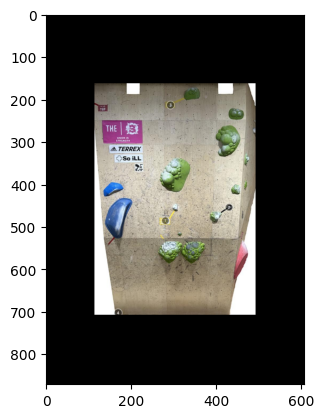

In [17]:
transform = A.Compose([
    A.CropAndPad(percent=0.3)
])
transformed_image = transform(image=test_image, masks=filled_masks)
plt.imshow(transformed_image["image"])
plt.show()

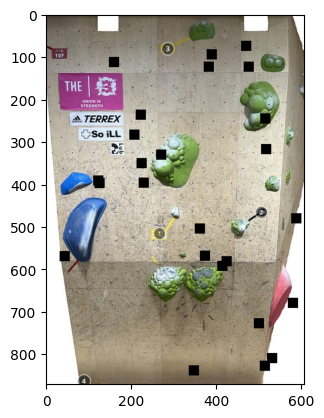

In [23]:
transform = A.Compose([
    A.CoarseDropout(max_holes=25, max_height=24, max_width=24, p=1)
])
transformed_image = transform(image=test_image, masks=filled_masks)
plt.imshow(transformed_image["image"])
plt.show()

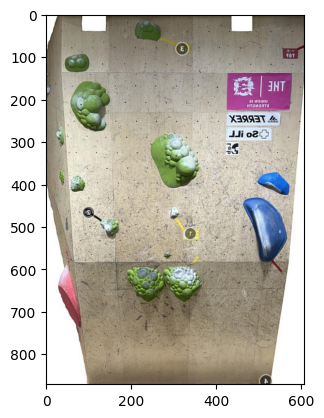

In [32]:
transform = A.Compose([
    A.HorizontalFlip(p=1)
])
transformed_image = transform(image=test_image, masks=filled_masks)
plt.imshow(transformed_image["image"])
plt.show()

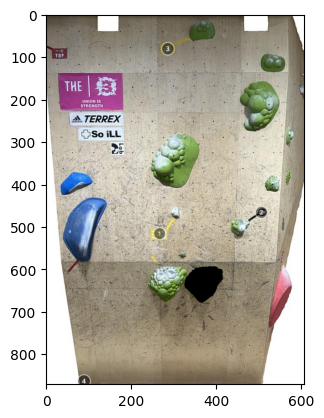

In [39]:
transform = A.Compose([
    A.MaskDropout(p=1, image_fill_value=0)
])
transformed_image = transform(image=test_image, mask=filled_masks[0])
plt.imshow(transformed_image["image"])
plt.show()

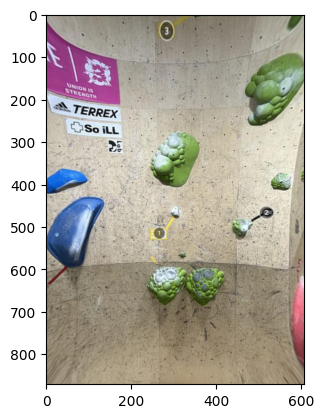

In [53]:
transform = A.Compose([
    A.OpticalDistortion(distort_limit=1, shift_limit=1, p=1)
])
transformed_image = transform(image=test_image, masks=filled_masks)
plt.imshow(transformed_image["image"])
plt.show()

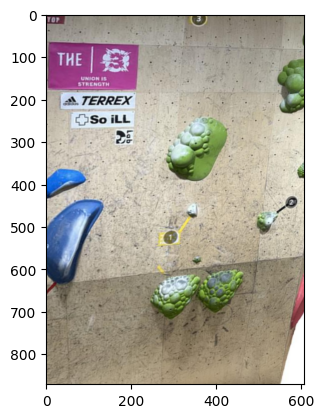

In [59]:
transform = A.Compose([
    A.Perspective(p=1)
])
transformed_image = transform(image=test_image, masks=filled_masks)
plt.imshow(transformed_image["image"])
plt.show()

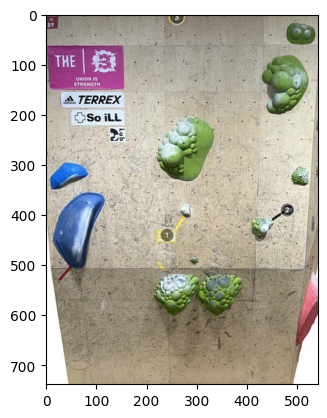

In [62]:
transform = A.Compose([
    A.RandomCropFromBorders(p=1)
])
transformed_image = transform(image=test_image, masks=filled_masks)
plt.imshow(transformed_image["image"])
plt.show()

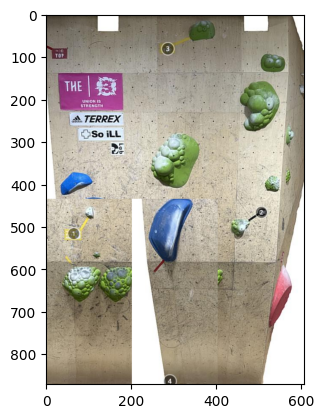

In [75]:
transform = A.Compose([
    A.RandomGridShuffle(grid=(2,3), always_apply=True, p=1)
])
transformed_image = transform(image=test_image, masks=filled_masks)
plt.imshow(transformed_image["image"])
plt.show()

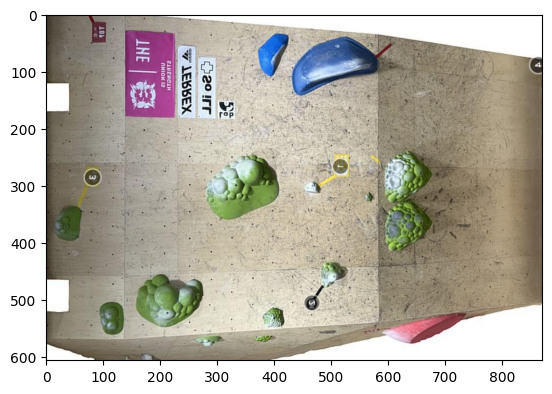

In [76]:
transform = A.Compose([
    A.Transpose(p=1)
])
transformed_image = transform(image=test_image, masks=filled_masks)
plt.imshow(transformed_image["image"])
plt.show()

BINARY NUMPY MASK INTO POLYGON

In [154]:
polygon_masks = coco_labels_ops.numpy_masks_to_coco_polygons(filled_masks)

C:\Users\marce\AppData\Local\Temp\ipykernel_24816\4279969364.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(50,50))


<Figure size 5000x5000 with 0 Axes>

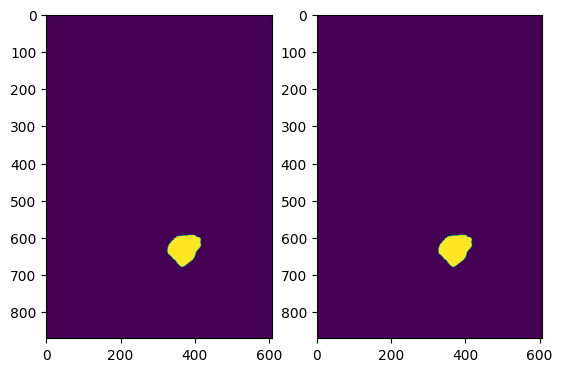

<Figure size 5000x5000 with 0 Axes>

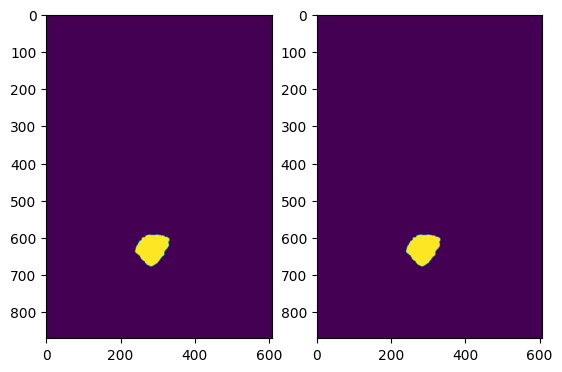

<Figure size 5000x5000 with 0 Axes>

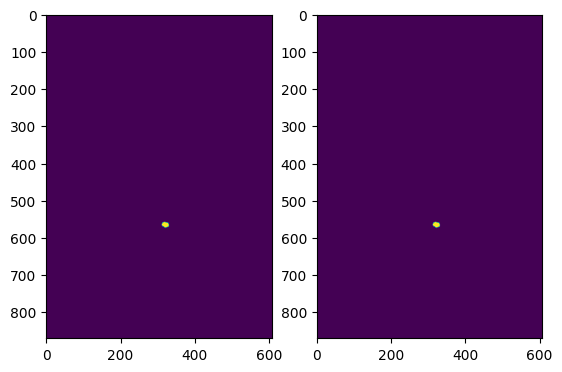

<Figure size 5000x5000 with 0 Axes>

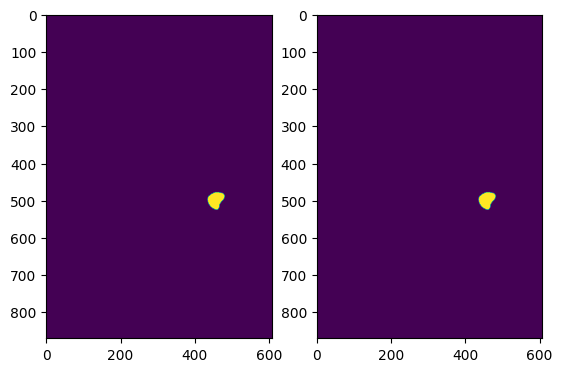

<Figure size 5000x5000 with 0 Axes>

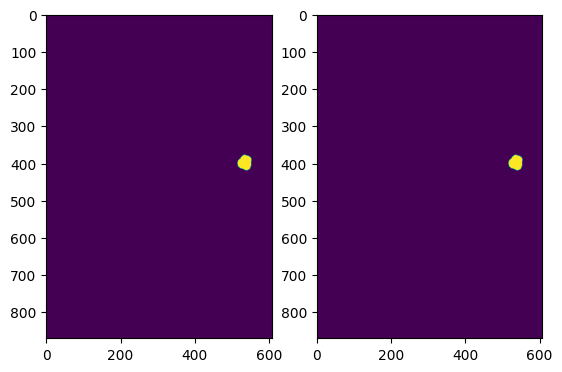

<Figure size 5000x5000 with 0 Axes>

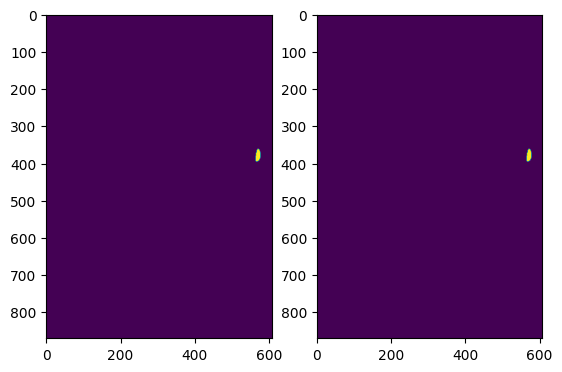

<Figure size 5000x5000 with 0 Axes>

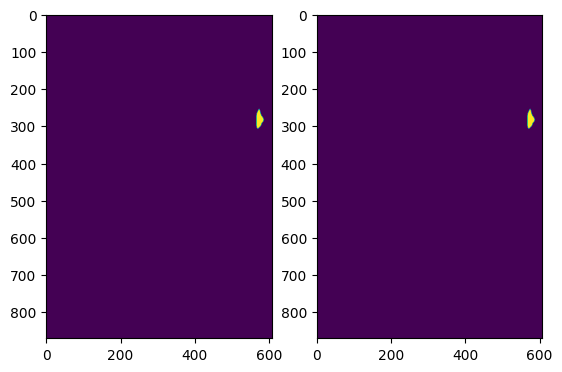

<Figure size 5000x5000 with 0 Axes>

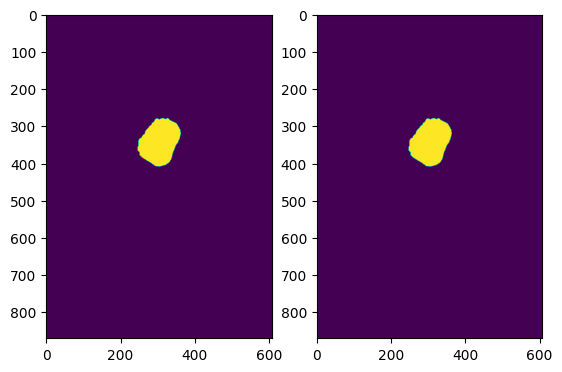

<Figure size 5000x5000 with 0 Axes>

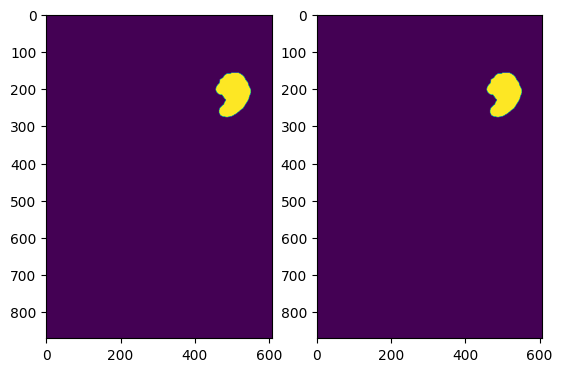

<Figure size 5000x5000 with 0 Axes>

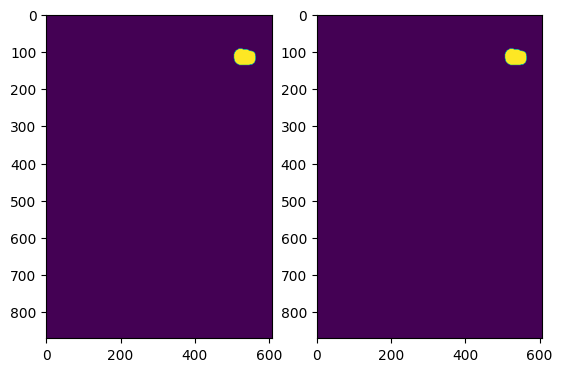

<Figure size 5000x5000 with 0 Axes>

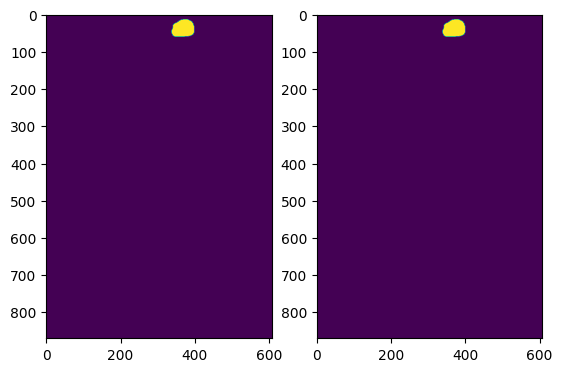

<Figure size 5000x5000 with 0 Axes>

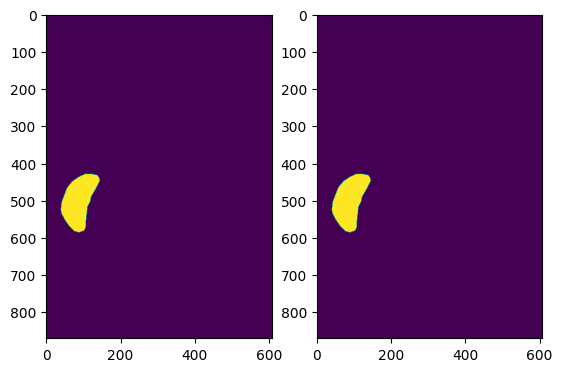

<Figure size 5000x5000 with 0 Axes>

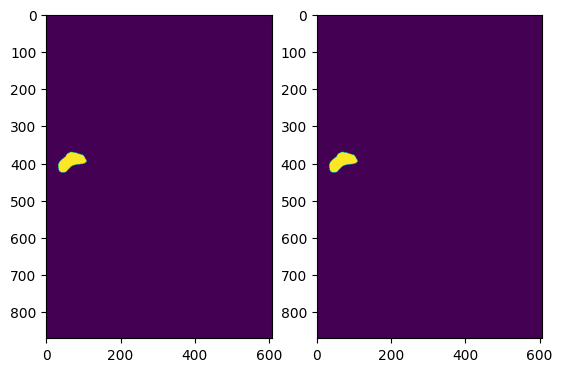

<Figure size 5000x5000 with 0 Axes>

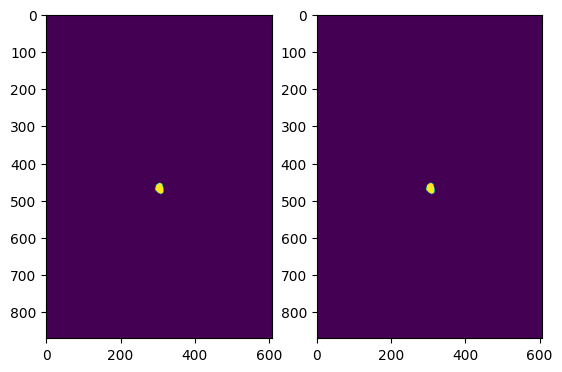

<Figure size 5000x5000 with 0 Axes>

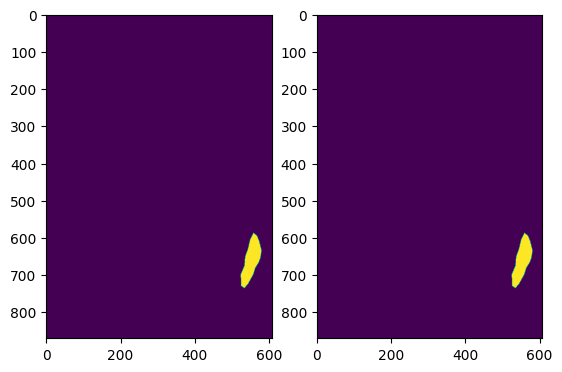

In [158]:
for i in range(len(filled_masks)):
    plt.figure(figsize=(50,50))
    f, ax = plt.subplots(1,2)
    ax[0].imshow(
        coco_labels_ops.coco_polygons_to_numpy_masks(
            polygon_masks,test_image.shape[:2],
        )[i],
    )
    ax[1].imshow(filled_masks[i])
        